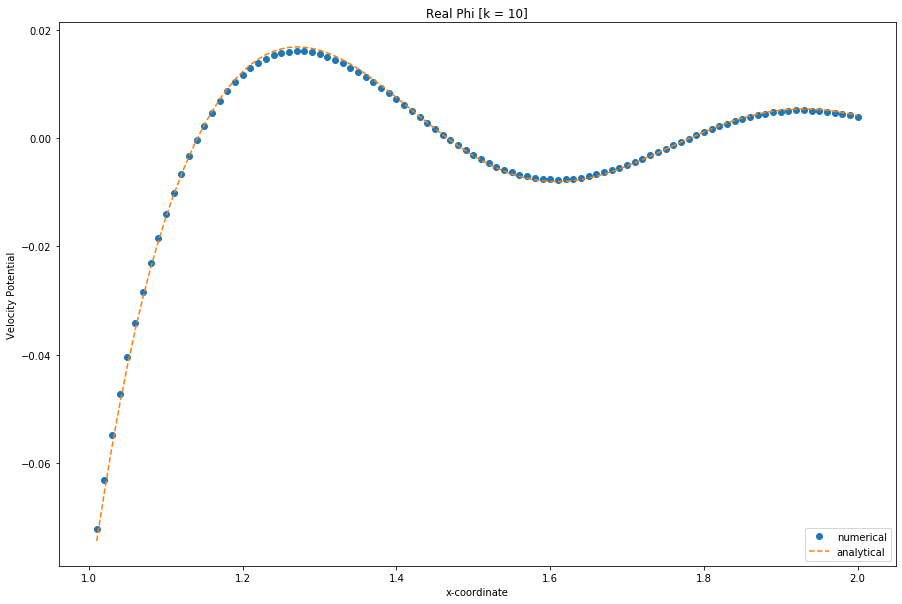

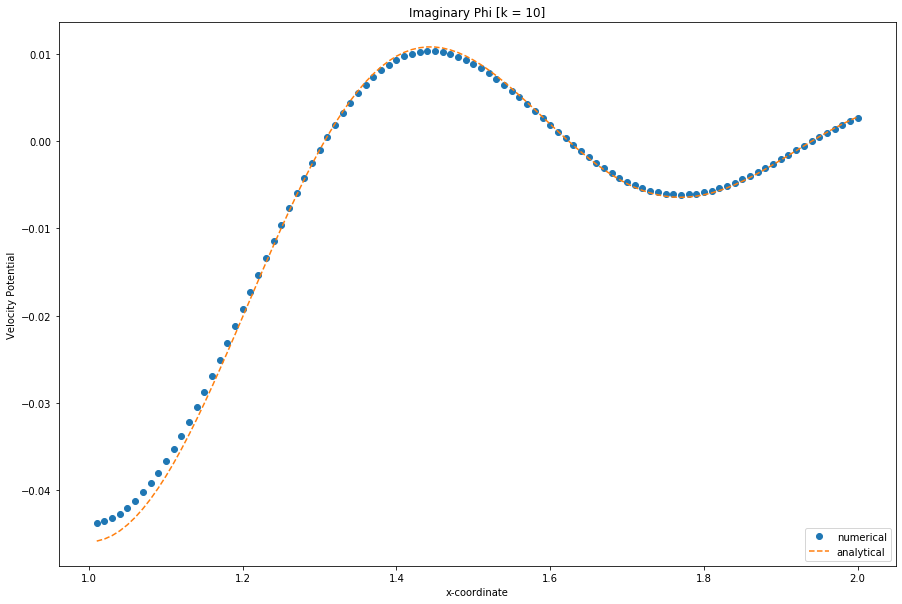

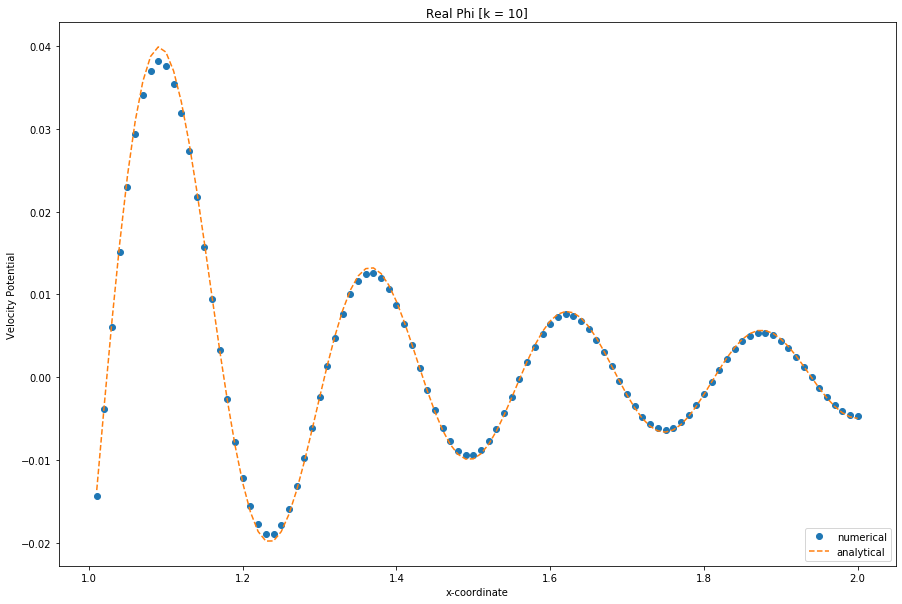

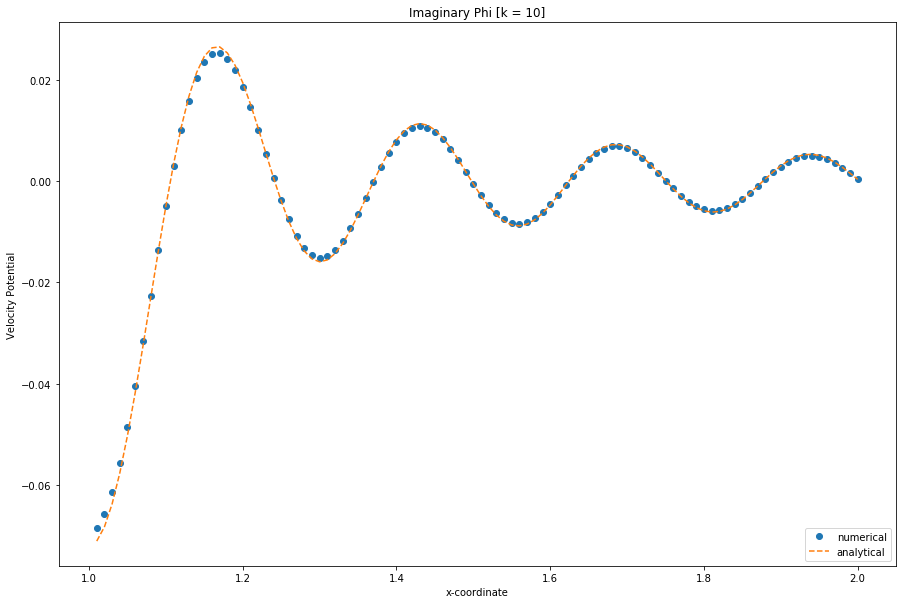

In [1]:
import abem as ab
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def plot_velocity_potential(title, x, bem, ana):
    plt.rcParams['figure.figsize'] = [15, 10]
    plt.title(title)
    BEM, = plt.plot(x, bem, 'o',  label = 'numerical')
    ANA, = plt.plot(x, ana, '--', label = 'analytical')
    plt.xlabel('x-coordinate')
    plt.ylabel('Velocity Potential')
    plt.legend(handles=[BEM, ANA], loc = 'lower right')
    plt.show()

def analytical_phis(k, density, c, velocity, r, x):
    y = np.subtract(x, 1.0)
    const = -1j * velocity / k
    variable = np.exp(np.multiply(1j * k, y)) - np.exp(1j * k * np.sqrt(np.square(r) + np.square(y)))
    return const * variable

def numerical_phis(k, velocity, mesh, samples):
    solver = ab.RayleighSolver3D(mesh)
    boundary_condition = solver.neumann_boundary_condition()
    boundary_condition.f.fill(velocity)

    boundary_solution = solver.solve_boundary(k, boundary_condition)
    return boundary_solution.solve_samples(samples)

exterior_points = np.zeros((100, 3), dtype=np.float32)
exterior_points[:,0] = np.linspace(1.01, 2.0, num=100)


# Test Problem 1

k = 10.0 # Wavenumber
frequency = ab.wavenumber_to_frequency(k)
velocity = 1.0 # piston velocity
c = 344.0
density = 1.205

num_phis = numerical_phis(k, velocity, ab.disk_3d(), exterior_points)

x = exterior_points[:, 0]
ana_phis = analytical_phis(k, density, c, velocity, 0.1, x)

plot_velocity_potential('Real Phi [k = 10]',      x, num_phis.real, ana_phis.real)
plot_velocity_potential('Imaginary Phi [k = 10]', x, num_phis.imag, ana_phis.imag)


# Test Problem 2

k = 25.0 # Wavenumber
frequency = ab.wavenumber_to_frequency(k)

num_phis = numerical_phis(k, velocity, ab.disk_3d(), exterior_points)

x = exterior_points[:, 0]
ana_phis = analytical_phis(k, density, c, velocity, 0.1, x)

plot_velocity_potential('Real Phi [k = 10]',      x, num_phis.real, ana_phis.real)
plot_velocity_potential('Imaginary Phi [k = 10]', x, num_phis.imag, ana_phis.imag)